# Veränderung der weltweiten Suizidrate

## Gruppe
- Meret Brand
- Steffi Neuhof
- Leah Talary
- Lena Seger

## Fragen
- In welchen Ländern hat die Suizidrate am meisten zugenommen?
- Weshalb könnte das so sein?

## Quellen
- https://ourworldindata.org/grapher/death-rate-from-suicides-gho?country=FIN~AUT~NOR~FRA~LUX~ESP~ITA



# 1. Daten beschaffen und laden

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px

In [ ]:
# loading the dataset

file_path = "suicide_rate.csv"
df = pd.read_csv(file_path)

# 2. Daten vorbereiten

In [26]:
# Rename column sfor easier access
df.columns = ["Entity", "Code", "Year", "Rate"]

In [27]:
# Convert Year to integer and Rate to numeric
df["Year"] = df["Year"].astype(int)
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")

# 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
-
-
-
-


In [28]:
df.dtypes

Entity     object
Code       object
Year        int64
Rate      float64
dtype: object

# 3.1 Global Trend (World)

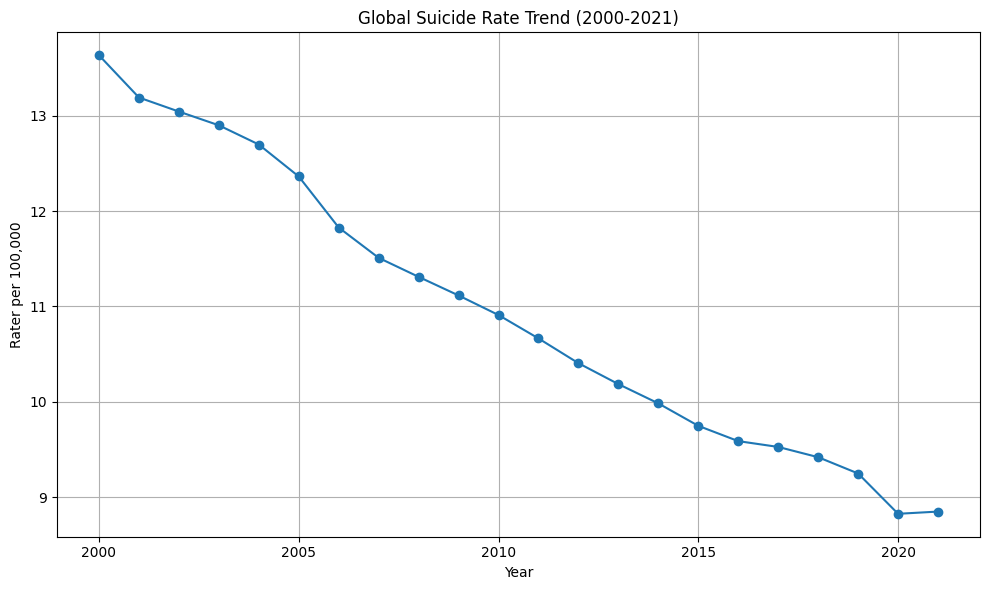

In [29]:
world_data = df[df["Entity"]=="World"]
plt.figure(figsize=(10, 6))
plt.plot(world_data["Year"], world_data["Rate"], marker="o")
plt.title("Global Suicide Rate Trend (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Rater per 100,000")
plt.grid(True)
plt.tight_layout()
plt.savefig("global_trend.png")

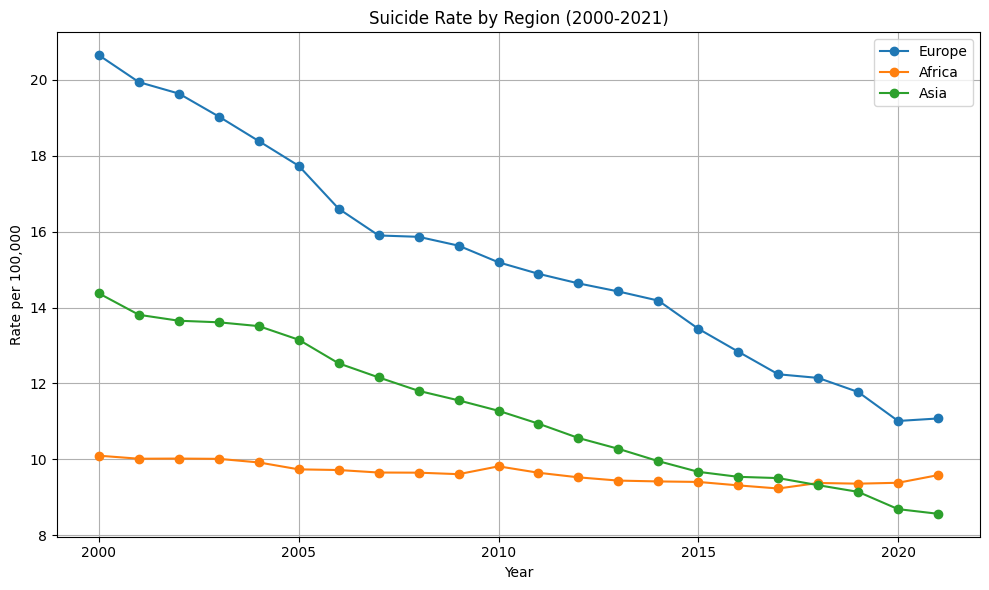

In [30]:
# Vergleich von Regionen (Europa, Afrika, Asien)
regions = ["Europe", "Africa", "Asia"]
region_data = df[df["Entity"].isin(regions)]
plt.figure(figsize=(10, 6))
for region in regions:
    subset = region_data[region_data["Entity"] == region]
    plt.plot(subset["Year"], subset["Rate"], marker="o", label=region)
plt.title("Suicide Rate by Region (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("region_comparison.png")

In [35]:
# Top-10 Länder basierend auf 2021 ermitteln
data_2021 = df[(df["Year"] == 2021) & (~df["Entity"].isin(["World", "Africa", "Europe", "Asia", "Oceania", "North America", "South America"]))]
top10_countries = data_2021.sort_values(by="Rate", ascending=False).head(10)["Entity"].tolist()

# Wähle die ersten 5 Länder aus
top5_countries = top10_countries[:5]

# Filtere die Daten für diese Länder
top5_data = df[df["Entity"].isin(top5_countries)]

Visualisierung erstellt: top5_trend.png


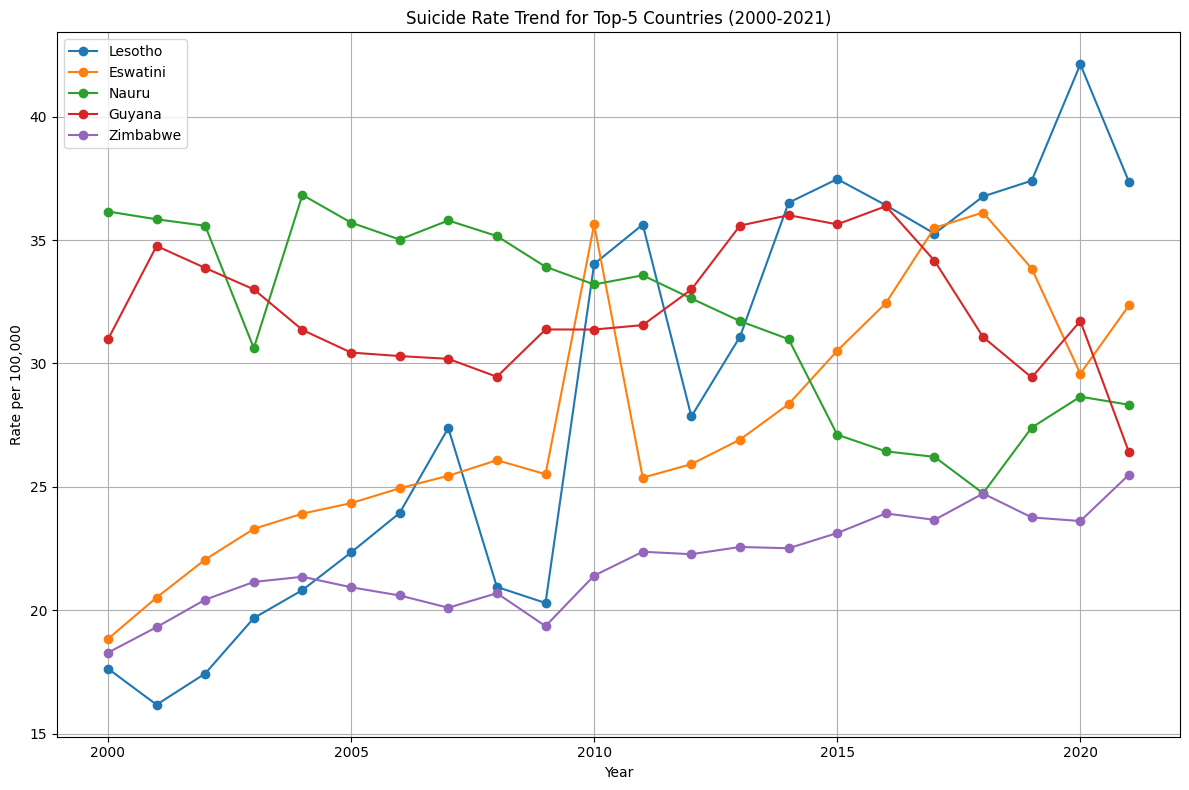

In [36]:
# Liniendiagramm erstellen
plt.figure(figsize=(12, 8))
for country in top5_countries:
    subset = top5_data[top5_data["Entity"] == country]
    plt.plot(subset["Year"], subset["Rate"], marker="o", label=country)

plt.title("Suicide Rate Trend for Top-5 Countries (2000-2021)")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("top5_trend.png")

print("Visualisierung erstellt: top5_trend.png")

C:\Users\leaht\AppData\Local\Temp\ipykernel_24268\735090234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Rate", y="Entity", data=top10, palette="Reds_r")


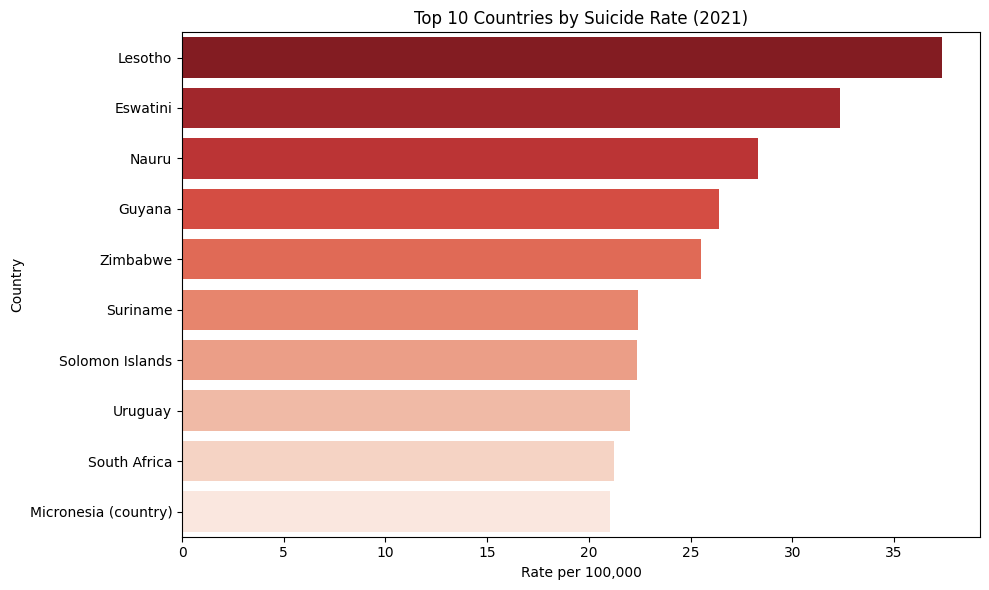

In [31]:
# Top 10 Länder mit höchster Rate im Jahr 2021
data_2021 = df[(df["Year"] == 2021) & (~df["Entity"].isin(["World", "Africa", "Europe", "Asia", "Oceania", "North America", "South America"]))]
top10 = data_2021.sort_values(by="Rate", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Rate", y="Entity", data=top10, palette="Reds_r")
plt.title("Top 10 Countries by Suicide Rate (2021)")
plt.xlabel("Rate per 100,000")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_countries.png")

In [22]:
# Anzahl Datenpunkte pro Jahr
df['Year'].value_counts().sort_index()

Year
2000    201
2001    201
2002    201
2003    201
2004    201
2005    201
2006    201
2007    201
2008    201
2009    201
2010    201
2011    201
2012    201
2013    201
2014    201
2015    201
2016    201
2017    201
2018    201
2019    201
2020    201
2021    201
Name: count, dtype: int64